# HomeWork 6
## QuickSort

Реализовать QuickSort (рандомизированный и обычный)
- алгоритм работает корректно, используется insertion sort: 3 балла
- алгоритм работает корректно, но выполняет много лишних действий / отклоняется от реализации не в лучшую сторону - 2 балл

Дополнительно:
- quicksort - сравнить рандомизированный и обычный варианты - 1 балл
- распараллелить алгоритм - 1 балл

In [24]:
import random
from typing import List

import time
import matplotlib.pyplot as plt  
import tqdm  # для отображения прогресс-бара

MIN_ARRAY_LEN = 5

## Функция для тестов

In [22]:
def profile(max_size, 
            sort_func, arr_gen_func=None, 
            sort_args={}, arr_gen_args={}, 
            runs_on_loop=10):
    """
    Профилирование работы функции сортировки
    
    Параметры:
    max_size - максимальный размер списка
    sort_func - функция сортировки, должна принимать на вход список и **kwargs
    arr_gen_func - функция для генерации списка, должна принимать на вход размер списка и **kwargs
    sort_args - доп. аргументы для sort_func
    arr_gen_args - доп. аргументы для arr_gen_func
    runs_on_loop - количество запусков в 1 итерации 
    """
    times = []
    sizes = []
    if not arr_gen_func:
        arr_gen_func = lambda size, **arr_gen_args: [random.randint(0, size) for _ in range(size)]
    
    sizes = []
    for i in range(1, 100):
        new_size = 4**i
        if new_size > max_size:
            break
        sizes.append(new_size)
    
    for arr_size in tqdm.tqdm(sizes):
        nested_time = []
        
        for _ in range(runs_on_loop):
            arr = arr_gen_func(arr_size, **arr_gen_args)
            start = time.process_time()
            sort_func(arr, **sort_args)
            nested_time.append(time.process_time() - start)
            
        times.append(sum(nested_time) / len(nested_time))
    return times, sizes

def generate_almost_sorted(size: int, shuffle_percents: int) -> List:
    """
    1. Генерируем список заданного размера
    2. Исходя из shuffle_percents рассчитываем шаг с которым мы мешаем элементы.
    Шаг=2 - меняем каждый 2 элемент со следующим
    Шаг=10 - меняем каждый 10 элемент со следующим
    и т.д.
    3. Если шаг находится в допустимых границах - перемешиваем элементы с полученным шагом
    
    Параметры:
    size: размер списка
    shuffle_percents: процент элементов в списке, которые нужно перемешать
    """
    array = list(range(size))
    
    step = int(100/shuffle_percents)
    if not (1 < step < len(array)):
        return array
    
    for i in range(0, len(array), step):
        array[i] = random.randint(0, size)
    
    return array

## Insertion Sort

In [5]:
def insertion_sort(array: List, step: int = 1, start: int = 0):
    for i in range(start + step, len(array), step):
        x = array[i]
        j = i

        while j >= step and array[j - step] > x:
            array[j] = array[j - step]
            j -= step

        array[j] = x

## Quick Sort

In [37]:
def quick_sort(array: List,
               begin: int = 0,
               end: int = -1,
               rand_pivot: bool = False):
    if len(array) <= MIN_ARRAY_LEN:
        insertion_sort(array)

    end = normalize_index(array, end)

    if begin < end:
        pivot = partition(array, begin, end, rand_pivot)

        quick_sort(array, begin, pivot, rand_pivot)
        quick_sort(array, pivot+1, end, rand_pivot)


def partition(array: List, begin: int, end: int, rand: bool = True) -> int:
    if rand:
        pivot_index = randint(begin, end-1)
        swap(array, pivot_index, end-1)
    pivot = array[end-1]

    i = begin - 1
    for j in range(begin, end-1):
        if array[j] <= pivot:
            i += 1
            swap(array, i, j)

    swap(array, i+1, end-1)
    return i+1


def normalize_index(array: List, index: int):
    return index if index >= 0 else len(array) + index + 1


def swap(array: List, i: int, j: int):
    if i == j:
        return
    array[i], array[j] = array[j], array[i]

## Тесты

### Обычный вариант (pivot - последний элемент в списке)

100%|██████████| 8/8 [00:03<00:00,  1.06s/it]


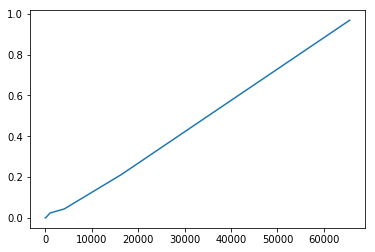

In [49]:
# Список в случайном порядке
times, sizes = profile(
    100000, quick_sort, 
    sort_args={"rand_pivot": False},
    runs_on_loop=5
)
plt.plot(sizes, times)

100%|██████████| 8/8 [00:07<00:00,  2.10s/it]


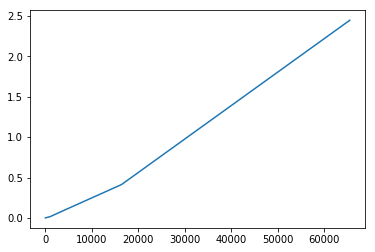

In [48]:
# Почти упорядоченный список
# shuffle_percents = 5%
times, sizes = profile(
    100000, quick_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 5},
    sort_args={"rand_pivot": False},
    runs_on_loop=5
)
plt.plot(sizes, times)

### Рандомизированный вариант (pivot - случайный элемент в списке)

100%|██████████| 8/8 [00:04<00:00,  1.33s/it]


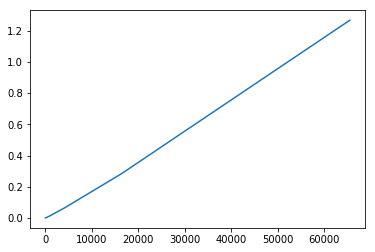

In [50]:
# Список в случайном порядке
times, sizes = profile(
    100000, quick_sort, 
    sort_args={"rand_pivot": True},
    runs_on_loop=5
)
plt.plot(sizes, times)

100%|██████████| 8/8 [00:04<00:00,  1.13s/it]


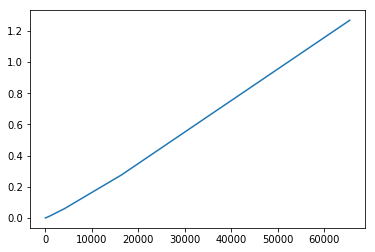

In [54]:
# Почти упорядоченный список
# shuffle_percents = 5%
times, sizes = profile(
    100000, quick_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 5},
    sort_args={"rand_pivot": True},
    runs_on_loop=5
)
plt.plot(sizes, times)